# PC5 -  Regularisation and model selection

cours [MAP 535](https://moodle.polytechnique.fr/course/view.php?id=14763): Regression de Karim Lounici

auteur de ce notebook python : Marc Lelarge

## Exercice 2 : Death Rate

The death rate is to be represented as a function of other variables.

You will need [mlxtend](http://rasbt.github.io/mlxtend/) To install it run: pip install mlxtend  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from model_selection_python import forwardSelection,backwardSelection,bothSelection,exhaustivesearch_selectionmodel
from diag_plot import diagnostic_plots

In [2]:
death_data = pd.read_csv('x28.txt',header=None)
del death_data[0]
death_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,997.875
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


In [3]:
death_data.columns = ["Precipitation","January_temperature","July_temperature","percent_65_or_older","household_size","schooling_over_22","full_kitchens","urban_population_density","nonwhite_population","office_workers","poor_families","hydrocarbons","oxides_of_Nitrogen","Sulfur_Dioxide","humidity","death_rate"]

In [4]:
death_data.head()

,Precipitation,January_temperature,July_temperature,percent_65_or_older,household_size,schooling_over_22,full_kitchens,urban_population_density,nonwhite_population,office_workers,poor_families,hydrocarbons,oxides_of_Nitrogen,Sulfur_Dioxide,humidity,death_rate
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,997.875
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


We seek to explain the mortality (death_rate ) according to sociological and environmental characteristics.

In [5]:
y = death_data['death_rate']
X = death_data.loc[:, death_data.columns != 'death_rate']
X = sm.add_constant(X) 
model = sm.OLS(y,X)
model_fitted = model.fit()

In [6]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     11.63
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           9.56e-11
Time:                        12:44:42   Log-Likelihood:                -284.40
No. Observations:                  60   AIC:                             600.8
Df Residuals:                      44   BIC:                             634.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1863.1573    410.828      4.535      0.000    1035.187    2691.128
Precipitation                2.0724      0.842      2.462      0.018       0.376       3.769
January_temperature         -2.1776      0.675     -3.225      0.002      -3.538      -0.817
July_temperature            -2.8338      1.771     -1.600      0.117      -6.403       0.735
percent_65_or_older        -14.0421      7.746     -1.813      0.077     -29.654       1.570
household_size            -115.4321     62.004     -1.862      0.069    -240.392       9.528
schooling_over_22          -24.2471     11.212     -2.163      0.036     -46.843      -1.651
full_kitchens               -1.1460      1.467     -0.781      0.439      -4.102       1.810
urban_population_density     0.0100      0.004      2.435      0.019       0.002       0.018
nonwhite_population          3.5332      1.282      2.755      0.009       0.949       6.118
office_workers               0.5229      1.551      0.337      0.738      -2.603       3.649
poor_families                0.2671      2.565      0.104      0.918      -4.903       5.437
hydrocarbons                -0.8890      0.452     -1.965      0.056      -1.801       0.023
oxides_of_Nitrogen           1.8664      0.934      1.997      0.052      -0.017       3.750
Sulfur_Dioxide              -0.0345      0.142     -0.242      0.810      -0.321       0.252
humidity                     0.5331      1.052      0.507      0.615      -1.586       2.653
==============================================================================
Omnibus:                        2.314   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.650
Skew:                           0.098   Prob(JB):                        0.438
Kurtosis:                       3.788   Cond. No.                     4.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model2 = smf.ols('death_rate~1 ',data=death_data)
model2_fitted = model2.fit()

In [8]:
sm.stats.anova_lm(model2_fitted,model_fitted)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,59.0,228307.643963,0.0,NaN,NaN,NaN
1,44.0,46000.763940,15.0,182306.880023,11.625173,9.559785e-11


In [9]:
death_data['add'] = np.random.normal(size=len(death_data),loc=10,scale=1)

In [10]:
y = death_data['death_rate']
X = death_data.loc[:, death_data.columns != 'death_rate']
X = sm.add_constant(X) 
model2 = sm.OLS(y,X)
model_fitted2 = model2.fit()

In [11]:
model_fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     10.76
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.85e-10
Time:                        12:44:42   Log-Likelihood:                -284.15
No. Observations:                  60   AIC:                             602.3
Df Residuals:                      43   BIC:                             637.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1891.0815    416.490      4.541      0.000    1051.150    2731.013
Precipitation                2.0478      0.849      2.412      0.020       0.336       3.760
January_temperature         -2.1923      0.681     -3.221      0.002      -3.565      -0.820
July_temperature            -2.9442      1.793     -1.642      0.108      -6.561       0.673
percent_65_or_older        -14.2738      7.813     -1.827      0.075     -30.031       1.483
household_size            -117.0001     62.517     -1.872      0.068    -243.077       9.077
schooling_over_22          -23.5985     11.347     -2.080      0.044     -46.481      -0.716
full_kitchens               -1.0592      1.484     -0.714      0.479      -4.053       1.934
urban_population_density     0.0104      0.004      2.478      0.017       0.002       0.019
nonwhite_population          3.5322      1.292      2.734      0.009       0.927       6.138
office_workers               0.4569      1.566      0.292      0.772      -2.702       3.616
poor_families                0.5419      2.625      0.206      0.837      -4.751       5.835
hydrocarbons                -0.9272      0.460     -2.015      0.050      -1.855       0.001
oxides_of_Nitrogen           1.9310      0.948      2.038      0.048       0.020       3.842
Sulfur_Dioxide              -0.0380      0.143     -0.265      0.792      -0.327       0.251
humidity                     0.5364      1.059      0.506      0.615      -1.600       2.673
add                         -2.7754      4.643     -0.598      0.553     -12.138       6.588
==============================================================================
Omnibus:                        2.037   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.358
Skew:                           0.033   Prob(JB):                        0.507
Kurtosis:                       3.734   Cond. No.                     4.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

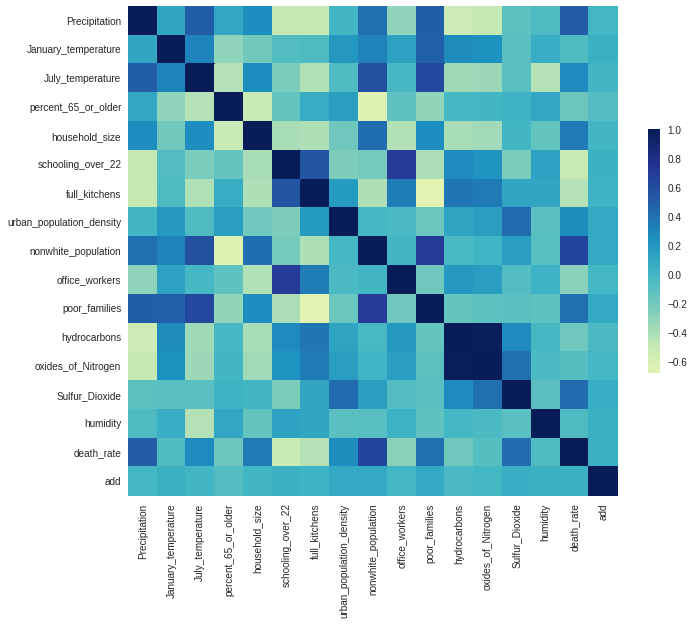

In [12]:
corr = death_data.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, center=0,
            square=True, cbar_kws={"shrink": .5},cmap='YlGnBu')

In [13]:
death_data.drop('add',axis=1,inplace=True)

In [14]:
y = death_data['death_rate']
X = death_data.loc[:, death_data.columns != 'death_rate']
X = sm.add_constant(X)

In [15]:
model_forward = forwardSelection(X,y)

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : nonwhite_population 	AIC : 466.5347076433107
Entered : schooling_over_22 	AIC : 451.0097018669498
Entered : January_temperature 	AIC : 440.6616924022021
Entered : urban_population_density 	AIC : 431.38408437797864
Entered : Precipitation 	AIC : 429.968109581321
Entered : Sulfur_Dioxide 	AIC : 426.48479854339865
Entered : July_temperature 	AIC : 424.89448380011606
break : Criteria
                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     23.59
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           4.61e-14
Time:                        12:44:43   Log-Likelihood:                -289.58
No. Observations:                  60   AIC:                      

In [16]:
model_backward = backwardSelection(X,y)

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : poor_families
Eliminated : Sulfur_Dioxide
Eliminated : office_workers
Eliminated : humidity
Eliminated : full_kitchens
break : Criteria
                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     18.67
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.75e-13
Time:                        12:44:43   Log-Likelihood:                -285.33
No. Observations:                  60   AIC:                             592.7
Df Residuals:                      49   BIC:                             615.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                    

In [17]:
model_both = bothSelection(X,y)

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : poor_families 	AIC : 428.5389035460041
Eliminated : Sulfur_Dioxide 	AIC : 426.6206081913886
Eliminated : office_workers 	AIC : 424.7153458441265
Eliminated : humidity 	AIC : 422.97409528991017
Eliminated : full_kitchens 	AIC : 422.39169934118746
break : Criteria
                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     18.67
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.75e-13
Time:                        12:44:43   Log-Likelihood:                -285.33
No. Observations:                  60   AIC:                             592.7
Df Residuals:                      49   BIC:                             615.7
Df Model:                

/home/marc/virtualenvs/regression/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/marc/virtualenvs/regression/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/marc/virtualenvs/regression/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

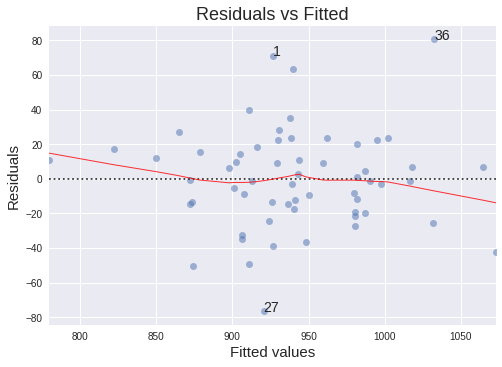

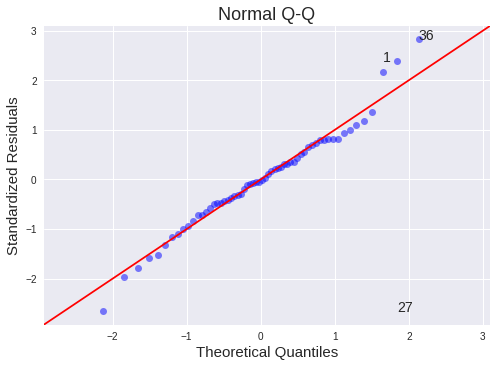

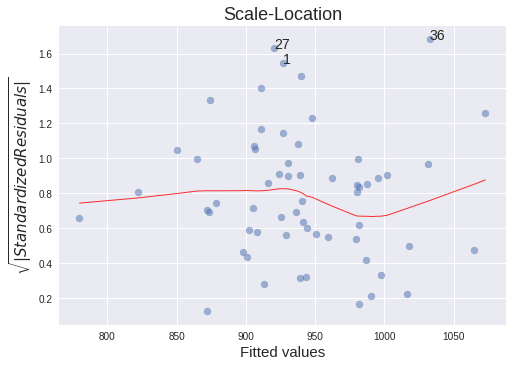

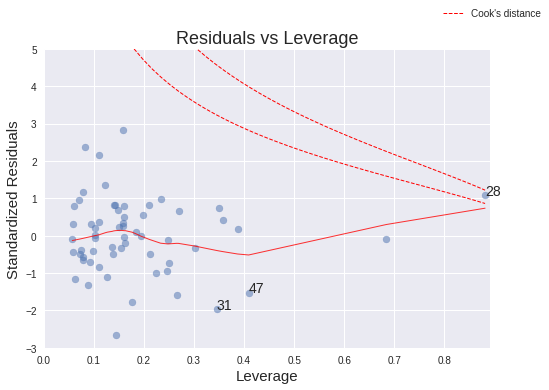

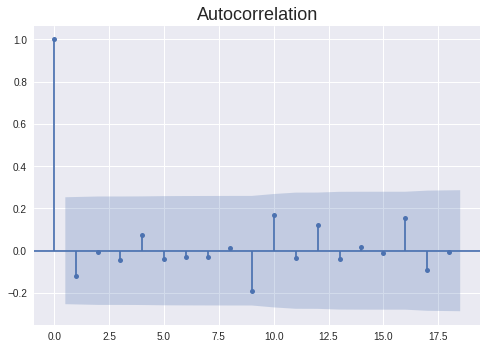

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
diagnostic_plots(X,y,model_both)
plot_acf(model_both.resid)
plt.show()

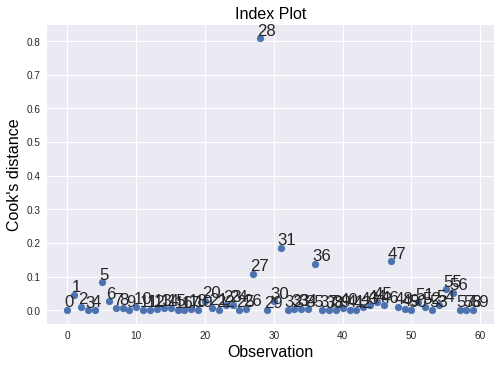

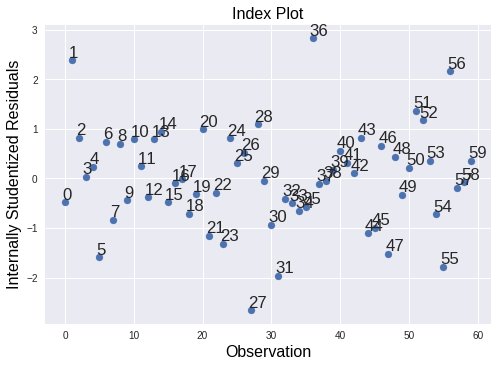

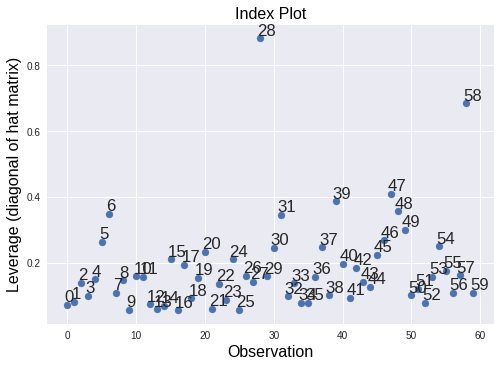

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

infl_model = model_both.get_influence()

infl_model.plot_index()
plt.show()
infl_model.plot_index(y_var='resid_studentized')
plt.show()
infl_model.plot_index(y_var='hat_diag_factor')
plt.show()

In [20]:
model_both.outlier_test(order=True)

,student_resid,unadj_p,bonf(p)
36,3.055205,0.003666,0.219941
27,-2.843728,0.006533,0.391967
1,2.510153,0.015493,0.929554
56,2.249013,0.029137,1.000000
31,-2.025885,0.048355,1.000000
55,-1.829361,0.073561,1.000000
5,-1.616473,0.112546,1.000000
47,-1.541756,0.129700,1.000000
51,1.380677,0.173774,1.000000
23,-1.322692,0.192205,1.000000
